In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pag = pd.read_sql("PRAGMA table_info(checker);",con=con)
pag

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [4]:
checker = pd.read_sql("SELECT * FROM checker WHERE uid LIKE 'user%'",con=con,parse_dates='timestamp')
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [5]:

checker['hour'] = checker['timestamp'].dt.hour
checker['minute'] = checker['timestamp'].dt.minute
checker['second'] =checker['timestamp'].dt.second
checker

,index,status,success,timestamp,numTrials,labname,uid,hour,minute,second
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,19,2
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,22,35
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,22,45
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,34,14
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,34,24
...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,19,6
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,22,41
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,22,41
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,37,0


In [6]:
lab = ['night','morning', 'afternoon', 'evening']
bins = [0, 14399,39599, 61199, 86399]
checker['daytime'] = checker['hour'] * 3600 + checker['minute'] * 60 + checker['second']
checker['daytime'] = pd.cut(checker['daytime'], bins=bins, labels=lab)

In [7]:
checker

,index,status,success,timestamp,numTrials,labname,uid,hour,minute,second,daytime
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,19,2,morning
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,22,35,morning
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,22,45,morning
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,34,14,morning
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,34,24,morning
...,...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,19,6,evening
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,22,41,evening
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,22,41,evening
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,37,0,evening


In [8]:
checker = checker.drop(columns=checker.columns[0:3])

In [9]:
checker = checker.drop(columns=checker.columns[1:7])

In [10]:
checker

,timestamp,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [11]:
checker['timestamp'] = checker['timestamp'].dt.date

In [12]:
checker

,timestamp,daytime
0,2020-04-17,morning
1,2020-04-17,morning
2,2020-04-17,morning
3,2020-04-17,morning
4,2020-04-17,morning
...,...,...
3202,2020-05-21,evening
3203,2020-05-21,evening
3204,2020-05-21,evening
3205,2020-05-21,evening


In [13]:
checker = checker.groupby(['timestamp', 'daytime'],observed=False).size().unstack(fill_value=0)

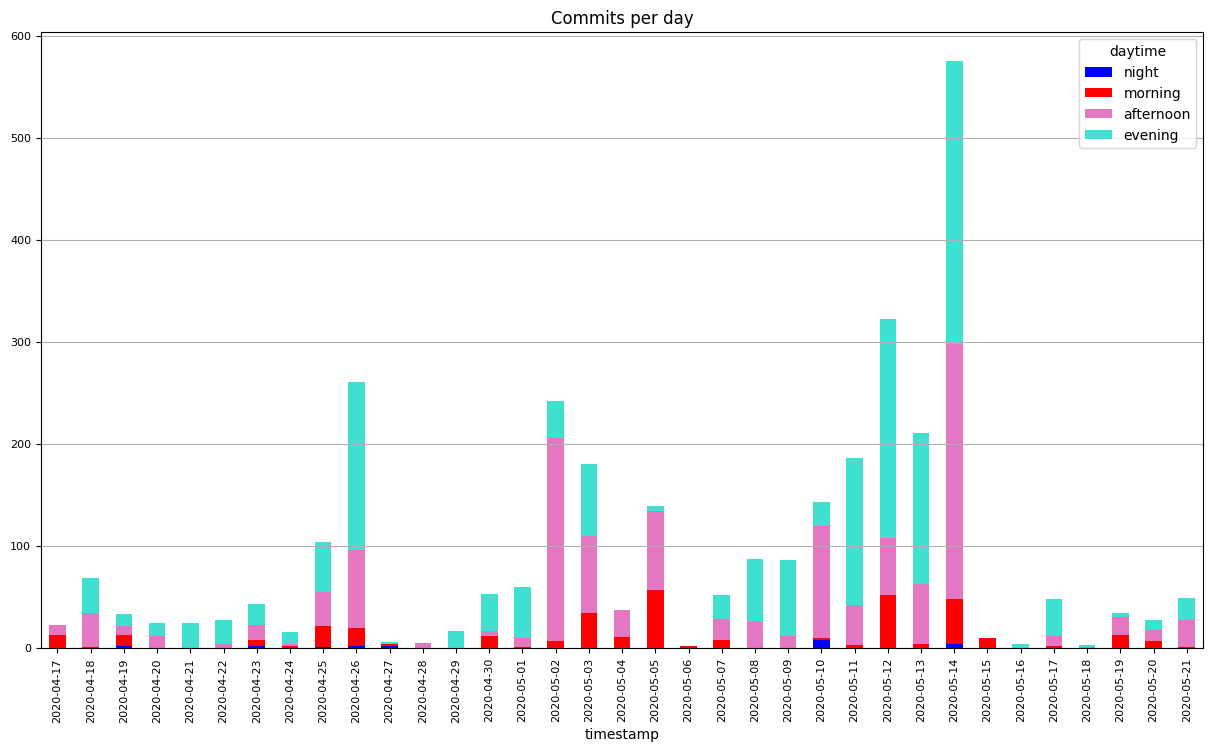

In [14]:
checker.plot(kind='bar',color=['blue','red','#e377c2','#40e0d0'],fontsize=8,figsize=(15,8),title="Commits per day",stacked=True).grid(True,axis='y')

“When do our users usually commit the labs: in the night, morning, afternoon, or evening? Answer is afternoon  and  evening

In [15]:
checker.sum()

daytime
night          21
morning       344
afternoon    1231
evening      1611
dtype: int64

Which day has:
the most number of commits
and at the same time, the number of commits in the evening is higher than in the afternoon?

In [16]:
checker[checker['evening'] > checker['afternoon']].sum(axis=1)

timestamp
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-16      4
2020-05-17     48
2020-05-18      3
dtype: int64

In [17]:
con.close()